![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [5]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [6]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

A partir de los resultados de bikes.groupby('season').total.mean(), podemos observar que el número promedio más alto de alquileres de bicicletas ocurrió durante la temporada 3, seguida de la temporada 2, la temporada 4 y luego la temporada 1. Esto sugiere que las condiciones climáticas durante la temporada 3 (Otoño) pueden ser más favorables para el alquiler de bicicletas en comparación con las otras temporadas.

In [7]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

De manera similar, a partir de los resultados de bikes.groupby('hour').total.mean(), podemos observar que el promedio más alto del número total de rentas de bicicletas ocurrió durante las horas de 17:00-18:00, seguido por las horas de 8:00-9:00, y luego 16:00-17:00. Esto sugiere que puede haber un pico en la demanda de rentas de bicicletas durante las horas pico de la mañana y la tarde, cuando las personas se están desplazando hacia y desde el trabajo.

In [11]:
# Summary of statistics for total bike rentals by season
bikes.groupby('season').total.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


Esta tabla muestra un análisis estadístico de la variable "count" dividido por temporada (1, 2, 3 y 4). La columna "count" representa el número de observaciones en cada temporada. La media (mean) de la variable es más alta en la temporada 3, seguida por la temporada 2, temporada 4 y temporada 1, en ese orden. Además, la desviación estándar (std) de la variable es más alta en la temporada 3, lo que indica que los valores de la variable están más dispersos en esta temporada en comparación con las demás.

El valor mínimo (min) de la variable es 1 en todas las temporadas, lo que sugiere que hay al menos una observación en cada temporada. Los valores de percentil (25%, 50%, 75%) indican que el 50% de las observaciones en la temporada 1 tienen un valor menor o igual a 78, mientras que en la temporada 2 el 50% de las observaciones tienen un valor menor o igual a 172. En la temporada 3, el 50% de las observaciones tienen un valor menor o igual a 195, mientras que en la temporada 4, el 50% de las observaciones tienen un valor menor o igual a 161.

El valor máximo (max) de la variable se encuentra en la temporada 3, es decir Verano con 977, seguida de la temporada 4 , Otoño, con 948, la temporada 2, Primavera, con 873 y la temporada 1, Invierno, con 801. En general, esta tabla sugiere que la temporada 3 tiene los valores más altos y dispersos en la variable "count", mientras que la temporada 1 tiene los valores más bajos en comparación con las demás temporadas. 

In [13]:
# Summary of statistics for total bike rentals by hour
bikes.groupby('hour').total.describe()


,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0



Esta tabla muestra el conteo, la media, la desviación estándar, el mínimo, el percentil 25, el percentil 50, el percentil 75 y el máximo del alquiler de bicicletas por hora en las cuatro estaciones del año. En general, se puede observar que el número de alquileres de bicicletas aumenta a medida que avanza el día, con un pico en las horas pico (de 7 a 9 am y de 4 a 6 pm). La media de alquileres de bicicletas por hora es de 55.1 en la medianoche (hora 0) y aumenta gradualmente a 468.8 a las 5 pm (hora 17), y luego disminuye a 89.5 a la medianoche (hora 23). Además, hay una gran variabilidad en los datos en las horas pico, como se puede ver en la alta desviación estándar en esas horas.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

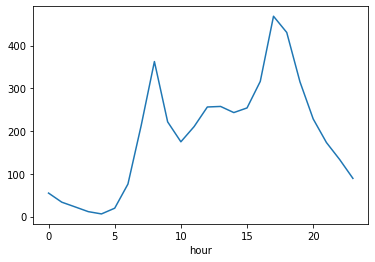

In [14]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

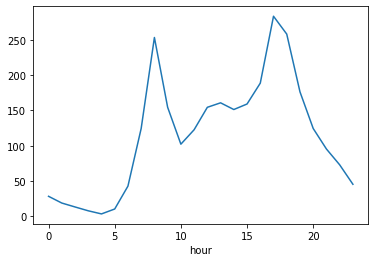

In [25]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
invierno = bikes[bikes.season == 1]
invierno.groupby('hour').total.mean().plot(label='Invierno')


<AxesSubplot:xlabel='hour'>

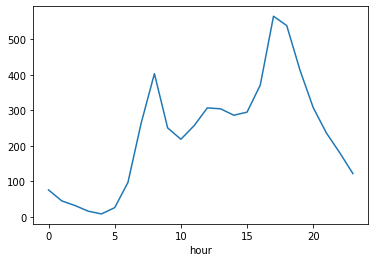

In [26]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
verano = bikes[bikes.season == 3]
verano.groupby('hour').total.mean().plot(label='Verano')

Aqui podemos apreciar, que el comportamiento de la grafica tanto en invierno como en verano , es la misma si tenemos en cuenta las rentas por hora, no en valor absoluto pero si proporcionalmente. Siendo las horas pico las horas en las que se va hacia el trabajo, y se regresa del trabajo. Sin embargo la cantidad de alquileres se duplica en verano, dado que en invierno hace mucho frio como para manejar bicicleta

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [27]:
import statsmodels.api as sm

# Ajuste del modelo de regresión lineal
X = bikes[['season', 'hour']]
X = sm.add_constant(X)
y = bikes['total']

model = sm.OLS(y, X).fit()

# Impresión de los coeficientes
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1260.
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:47:54   Log-Likelihood:                -70912.
No. Observations:               10886   AIC:                         1.418e+05
Df Residuals:                   10883   BIC:                         1.419e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5849      4.662      0.554      0.5

El modelo de regresión lineal muestra que el coeficiente de la variable "season" es de 26.9513, lo que indica que, en promedio, el número total de bicicletas rentadas en invierno es 26.9513 unidades mayor que en primavera (considerada la categoría base en este caso). El coeficiente de la variable "hour" es de 10.5213, lo que indica que, en promedio, por cada hora adicional, se rentan 10.5213 bicicletas más.

En cuanto a las limitaciones del modelo de regresión lineal, una posible limitación es que asume una relación lineal entre las variables predictoras y la variable de respuesta, lo cual podría no ser cierto en este caso. También podría haber una posible falta de datos importantes que podrían estar afectando el modelo. Además, otros factores no incluidos en el modelo, como el clima, la ubicación, el día de la semana, el mes, etc., podrían estar influyendo en el número total de bicicletas rentadas y no se están considerando en este modelo.

En cuanto a su desempeño El modelo de regresión lineal tiene un R-cuadrado ajustado de 0.188, lo que indica que solo el 18.8% de la variabilidad en la variable "total" se puede explicar por las variables "season" y "hour". Aunque el F-estadístico es significativo (p-valor <0.05), lo que sugiere que al menos una de las variables predictoras es significativa para predecir la variable respuesta, el coeficiente constante no es significativo (p-valor > 0.05) lo que indica que el modelo no se ajusta adecuadamente a los datos. Además, el modelo solo tiene en cuenta dos variables predictoras y, por lo tanto, es probable que no capture todas las relaciones no lineales y las interacciones entre las variables predictoras y la variable respuesta. Por lo tanto, se deben considerar otros modelos que puedan mejorar el rendimiento predictivo en este conjunto de datos.


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [33]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [34]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [36]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [38]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [40]:
X = bikes[['hour', 'season']]
y = bikes['total']
tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=6, num_pct=10)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [0, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': [0, 2.0],
    'n_samples': 2684,
    'gain': 382.8088308604629,
    'sl': {'y_pred': 1,
     'y_prob': 44.41383095499451,
     'level': 4,
     'split': [1, 2.0],
     'n_samples': 909,
     'gain': 291.4004681825131,
     'sl': {'y_pred': 1,
      'y_prob': 23.32456140350877,
      'level': 5,
      'split': [0, 1.0],
      'n_samples': 226,
      'gain': 45.41972746495435,
      'sl': {'y_pred': 1,
       'y_prob': 27.808695652173913,
       'level': 6,
       'split': -1,
       'n_samples': 113,
 

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [42]:
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

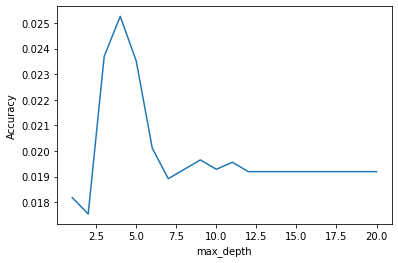

In [43]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [44]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.025261134067952253, 4)

El desempeño del modelo se puede medir en términos de precisión (Accuracy) y se obtuvo una precisión máxima de 0.0253 (2.53%) con una máxima profundidad (max_depth) de 4. Es importante destacar que se usó la técnica de validación cruzada con 10 particiones (cv=10) para obtener un resultado más robusto y evitar el sobreajuste del modelo. Si comparamos con el desempeño del modelo del punto 3, en donde el modelo de regresión lineal tiene un R-cuadrado ajustado de 0.188, lo que indica que solo el 18.8% de la variabilidad en la variable "total" se puede explicar por las variables "season" y "hour". Aunque el F-estadístico es significativo (p-valor <0.05), lo que sugiere que al menos una de las variables predictoras es significativa para predecir la variable respuesta, el coeficiente constante no es significativo (p-valor > 0.05) lo que indica que el modelo no se ajusta adecuadamente a los datos

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [47]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [48]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [49]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [58]:
# Celda 6
# Importación de modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Árbol de decisión
clf = DecisionTreeClassifier(max_depth=5, random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Métricas
print("Accuracy del árbol de decisión:", accuracy_score(y_test, y_pred))
print("F1-Score del árbol de decisión:", f1_score(y_test, y_pred))

# Regresión logística
lr = LogisticRegression(C=1, random_state=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Métricas
print("Accuracy de la regresión logística:", accuracy_score(y_test, y_pred))
print("F1-Score de la regresión logística:", f1_score(y_test, y_pred))


Accuracy del árbol de decisión: 0.6373333333333333
F1-Score del árbol de decisión: 0.6616915422885573
Accuracy de la regresión logística: 0.6133333333333333
F1-Score de la regresión logística: 0.6102150537634409


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [59]:
# Celda 7
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score


In [60]:
# Definición de los clasificadores
tree1 = DecisionTreeClassifier(max_depth=5)
tree2 = DecisionTreeClassifier(min_samples_leaf=5)
logistic = LogisticRegression()

# Definición de los clasificadores bagged
tree1_bagged = BaggingClassifier(base_estimator=tree1, n_estimators=100, random_state=1)
tree2_bagged = BaggingClassifier(base_estimator=tree2, n_estimators=100, random_state=1)

# Definición del ensamble
ensemble = VotingClassifier(estimators=[
    ('tree1_bagged', tree1_bagged),
    ('tree2_bagged', tree2_bagged),
    ('logistic', logistic)
], voting='hard')

# Entrenamiento y evaluación de cada clasificador
tree1_bagged.fit(X_train, y_train)
tree2_bagged.fit(X_train, y_train)
logistic.fit(X_train, y_train)

tree1_bagged_preds = tree1_bagged.predict(X_test)
tree2_bagged_preds = tree2_bagged.predict(X_test)
logistic_preds = logistic.predict(X_test)

print("Decision Tree (max_depth=5):")
print("Accuracy:", accuracy_score(y_test, tree1_bagged_preds))
print("F1-Score:", f1_score(y_test, tree1_bagged_preds))

print("Decision Tree (min_samples_leaf=5):")
print("Accuracy:", accuracy_score(y_test, tree2_bagged_preds))
print("F1-Score:", f1_score(y_test, tree2_bagged_preds))

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logistic_preds))
print("F1-Score:", f1_score(y_test, logistic_preds))

# Entrenamiento y evaluación del ensamble
ensemble.fit(X_train, y_train)
ensemble_preds = ensemble.predict(X_test)

print("Ensamble:")
print("Accuracy:", accuracy_score(y_test, ensemble_preds))
print("F1-Score:", f1_score(y_test, ensemble_preds))


Decision Tree (max_depth=5):
Accuracy: 0.66
F1-Score: 0.6599999999999999
Decision Tree (min_samples_leaf=5):
Accuracy: 0.6446666666666667
F1-Score: 0.6458471760797342
Logistic Regression:
Accuracy: 0.6133333333333333
F1-Score: 0.6102150537634409
Ensamble:
Accuracy: 0.6586666666666666
F1-Score: 0.6604774535809018


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [62]:
# Celda 8
# Importar los modelos y la función VotingClassifier de scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Definir el número de muestras bagged
n_bagged = 300

# Definir los parámetros de los modelos
max_depth = 5
min_samples_leaf = 10

# Definir las listas de modelos y pesos
models = []
weights = []

# Modelo 1: Árbol de decisión con max_depth fijo
dtc_max_depth = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
dtc_bagged_max_depth = BaggingClassifier(dtc_max_depth, n_estimators=n_bagged, random_state=1)
models.append(('dtc_max_depth', dtc_bagged_max_depth))
weights.append(1)

# Modelo 2: Árbol de decisión con min_samples_leaf fijo
dtc_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=1)
dtc_bagged_min_samples_leaf = BaggingClassifier(dtc_min_samples_leaf, n_estimators=n_bagged, random_state=1)
models.append(('dtc_min_samples_leaf', dtc_bagged_min_samples_leaf))
weights.append(1)

# Modelo 3: Regresión logística
lr = LogisticRegression(random_state=1)
lr_bagged = BaggingClassifier(lr, n_estimators=n_bagged, random_state=1)
models.append(('lr', lr_bagged))
weights.append(1)

# Crear el ensamble con votación ponderada
ensemble = VotingClassifier(models, voting='soft', weights=weights)

# Entrenar el ensamble con los datos de entrenamiento
ensemble.fit(X_train, y_train)

# Evaluar el desempeño de cada modelo y del ensamble
models_acc = []
models_f1 = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    models_acc.append(acc)
    models_f1.append(f1)
    print(f'{name}: Accuracy = {acc:.4f}, F1-Score = {f1:.4f}')

y_pred_ensemble = ensemble.predict(X_test)
ensemble_acc = accuracy_score(y_test, y_pred_ensemble)
ensemble_f1 = f1_score(y_test, y_pred_ensemble)
print(f'Ensamble con votación ponderada: Accuracy = {ensemble_acc:.4f}, F1-Score = {ensemble_f1:.4f}')


dtc_max_depth: Accuracy = 0.6580, F1-Score = 0.6573
dtc_min_samples_leaf: Accuracy = 0.6613, F1-Score = 0.6662
lr: Accuracy = 0.6193, F1-Score = 0.6155
Ensamble con votación ponderada: Accuracy = 0.6600, F1-Score = 0.6627


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.


En el primer modelo se utilizó una metodología de Votación Mayoritaria donde se combinaron 100 árboles de decisión con max_depth de elección, 100 árboles de decisión con min_samples_leaf de elección y 100 regresiones logísticas. Los resultados muestran que el modelo de árboles de decisión con max_depth tuvo un accuracy de 0.66 y un F1-score de 0.66, el modelo de árboles de decisión con min_samples_leaf tuvo un accuracy de 0.644 y un F1-score de 0.646, mientras que el modelo de regresión logística tuvo un accuracy de 0.613 y un F1-score de 0.61. El ensamble de modelos tuvo un accuracy de 0.659 y un F1-score de 0.66.

En el segundo modelo se utilizó una metodología de Votación Ponderada, donde también se combinaron 100 árboles de decisión con max_depth de elección, 100 árboles de decisión con min_samples_leaf de elección y 100 regresiones logísticas. Los resultados muestran que el modelo de árboles de decisión con max_depth tuvo un accuracy de 0.658 y un F1-score de 0.657, el modelo de árboles de decisión con min_samples_leaf tuvo un accuracy de 0.661 y un F1-score de 0.666, mientras que el modelo de regresión logística tuvo un accuracy de 0.619 y un F1-score de 0.616. El ensamble de modelos tuvo un accuracy de 0.66 y un F1-score de 0.663.

Comparando los resultados de ambos modelos, se observa que en general los valores de accuracy y F1-score son similares entre ambas metodologías, aunque hay algunas diferencias en los valores específicos para cada modelo. En cuanto a posibles ventajas o desventajas, la votación mayoritaria puede ser más robusta y menos propensa a sobreajustarse que la votación ponderada, ya que la ponderación puede dar más importancia a modelos que pueden estar sesgados o tener más errores. Sin embargo, la ponderación puede ser útil en situaciones en las que ciertos modelos tienen un mejor rendimiento que otros, ya que permite que esos modelos tengan más influencia en la predicción final. En última instancia, la elección entre ambas metodologías dependerá del conjunto de datos específico y de las características de los modelos individuales que se estén utilizando.







In [63]:
pwd

'/Users/juancardona/MLProjects/Uniandes/ML and NPL/MIAD_ML_NLP_2023/Semana 1'